In [1]:
# Importing Necessary Liabrary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset/Test_farmmitra_Dataset.csv')

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,87,44,40,19.443986,81.794664,5.958209,174.693843,rice
2,88,45,43,20.441165,81.324861,6.232690,218.079073,rice
3,90,41,41,19.959130,81.750387,6.991755,171.576057,rice
4,92,42,42,19.833928,81.160192,7.036952,167.894497,rice


In [4]:
df.rename(columns={'N': 'Nitrogen', 'P': 'Phosphorous', 'K': 'Potassium'}, inplace=True)

In [5]:
df.head()

,Nitrogen,Phosphorous,Potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,87,44,40,19.443986,81.794664,5.958209,174.693843,rice
2,88,45,43,20.441165,81.324861,6.232690,218.079073,rice
3,90,41,41,19.959130,81.750387,6.991755,171.576057,rice
4,92,42,42,19.833928,81.160192,7.036952,167.894497,rice


In [6]:
df.count()

Nitrogen       55000
Phosphorous    55000
Potassium      55000
temperature    55000
humidity       55000
ph             55000
rainfall       55000
label          55000
dtype: int64

In [7]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [8]:
# These are these unique labels, which act as a target variables.

In [9]:
len(df['label'].unique())
# The Number of unique values are 22

22

In [10]:
#Statistical Information about Data
df.describe()

,Nitrogen,Phosphorous,Potassium,temperature,humidity,ph,rainfall
count,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000
mean,50.554509,53.344291,48.141927,25.603969,71.479071,6.462762,103.531000
std,36.967796,33.025893,50.680352,5.185908,22.269277,0.959378,61.534658
min,-3.000000,2.000000,2.000000,6.948134,13.275688,2.513209,-29.019458
25%,21.000000,28.000000,20.000000,22.496077,60.173646,5.815108,59.932986
50%,37.000000,51.000000,32.000000,25.624695,80.435015,6.448189,94.941255
75%,85.000000,68.000000,49.000000,28.576041,89.774881,7.072323,139.218288
max,143.000000,148.000000,208.000000,45.559966,100.972718,10.871501,344.787161


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     55000 non-null  int64  
 1   Phosphorous  55000 non-null  int64  
 2   Potassium    55000 non-null  int64  
 3   temperature  55000 non-null  float64
 4   humidity     55000 non-null  float64
 5   ph           55000 non-null  float64
 6   rainfall     55000 non-null  float64
 7   label        55000 non-null  object 
dtypes: float64(4), int64(3), object(1)
memory usage: 3.4+ MB


In [12]:
df[df.duplicated() == True].count()

Nitrogen       0
Phosphorous    0
Potassium      0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

## observation:
1. There are No Duplicate Values
2. Total Length of dataset is 55000
3. Label is object type is Target variables
4. There are no-null values

In [13]:
df

,Nitrogen,Phosphorous,Potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,87,44,40,19.443986,81.794664,5.958209,174.693843,rice
2,88,45,43,20.441165,81.324861,6.232690,218.079073,rice
3,90,41,41,19.959130,81.750387,6.991755,171.576057,rice
4,92,42,42,19.833928,81.160192,7.036952,167.894497,rice
...,...,...,...,...,...,...,...,...
54995,105,19,32,24.135882,60.761203,5.963135,180.872019,coffee
54996,103,21,31,22.632213,61.319431,6.484813,188.315739,coffee
54997,105,15,32,24.251396,60.031748,7.470093,156.188460,coffee
54998,106,18,29,22.942116,61.183982,6.022039,134.223657,coffee


<AxesSubplot:xlabel='label', ylabel='count'>

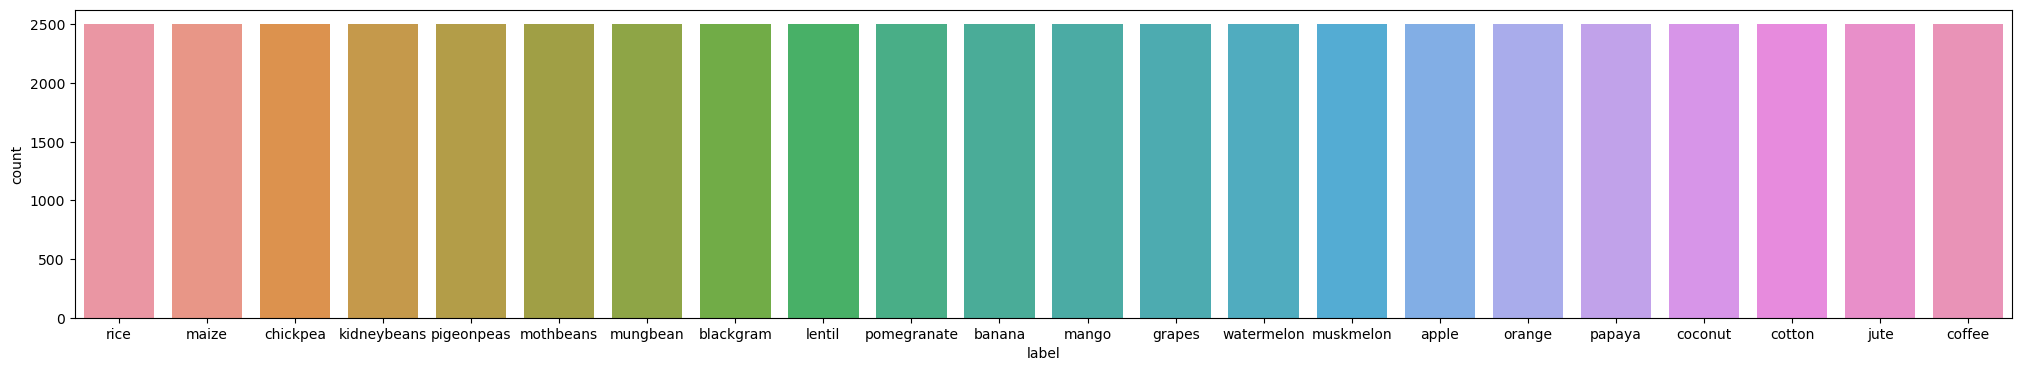

In [14]:
import seaborn as sns
plt.figure(figsize=(25, 4))
sns.countplot(x = 'label', data = df)

In [15]:
#Observation 
#Here we can see that each label has equal number of values ie 2500

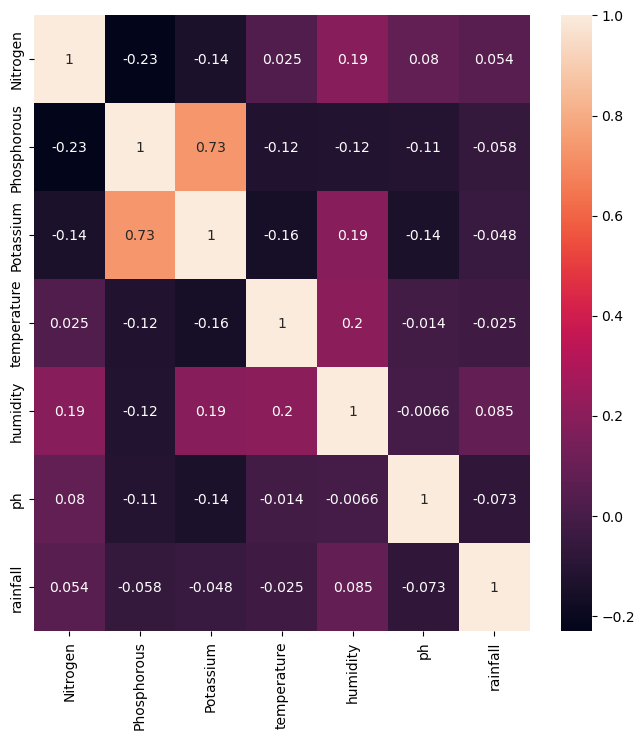

In [16]:
#Checking for correlation
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

### From the above chart we can conclude that : - 
1) If the value of Potassium increases there is 73% chances that the values of Phosporous will increase

2) Nitrogen & Potassium are inversely related

3) Phosphororus & Nitrogen are inversely related

4) Phosphorous are Potassium are directly related to each other. There is 73% chance that when Potassium increases Phosphorous also increases

In [17]:
df

,Nitrogen,Phosphorous,Potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,87,44,40,19.443986,81.794664,5.958209,174.693843,rice
2,88,45,43,20.441165,81.324861,6.232690,218.079073,rice
3,90,41,41,19.959130,81.750387,6.991755,171.576057,rice
4,92,42,42,19.833928,81.160192,7.036952,167.894497,rice
...,...,...,...,...,...,...,...,...
54995,105,19,32,24.135882,60.761203,5.963135,180.872019,coffee
54996,103,21,31,22.632213,61.319431,6.484813,188.315739,coffee
54997,105,15,32,24.251396,60.031748,7.470093,156.188460,coffee
54998,106,18,29,22.942116,61.183982,6.022039,134.223657,coffee


C:\Users\afraa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Nitrogen', ylabel='Density'>

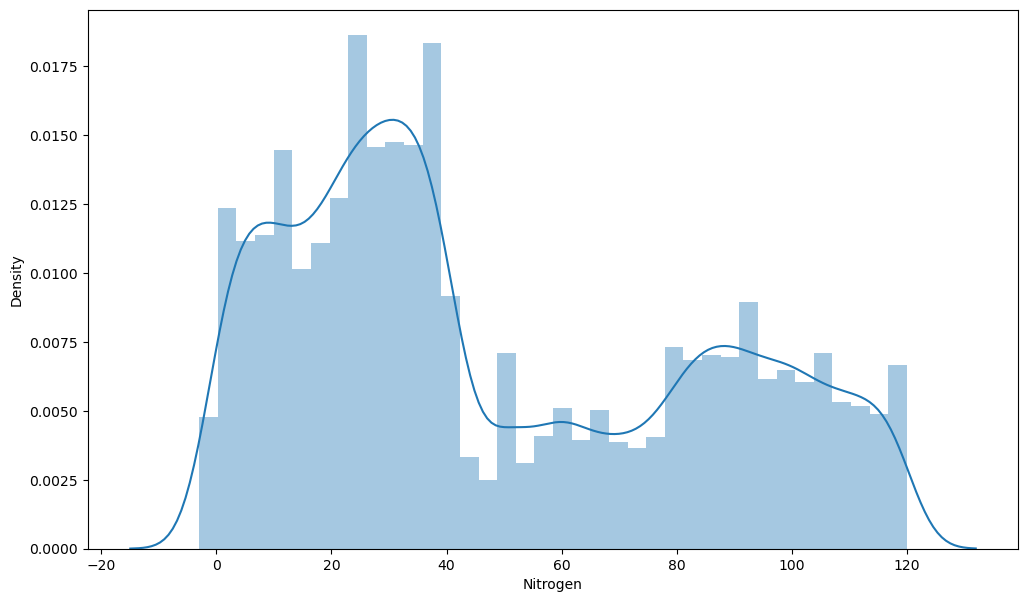

In [35]:
plt.figure(figsize = [12,7])
sns.distplot(df['Nitrogen'])

C:\Users\afraa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Phosphorous', ylabel='Density'>

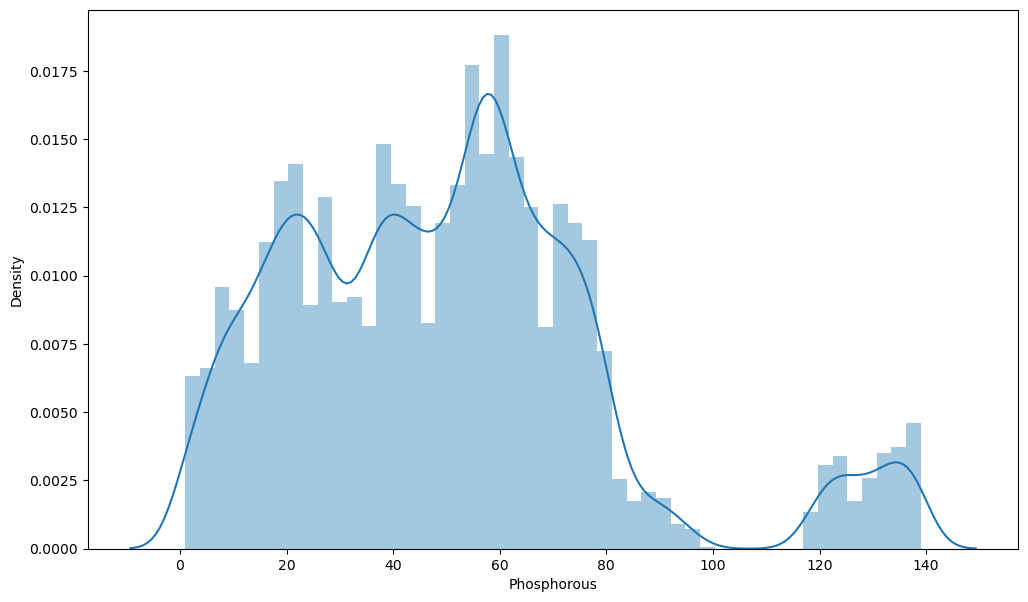

In [36]:
plt.figure(figsize = [12,7])
sns.distplot(df['Phosphorous'])

C:\Users\afraa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Potassium', ylabel='Density'>

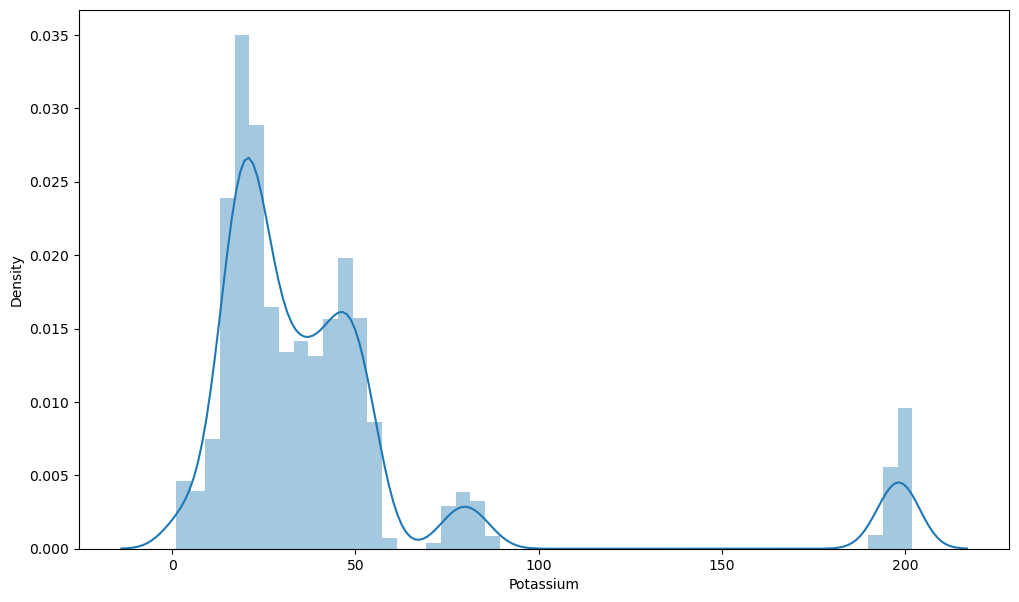

In [37]:
plt.figure(figsize = [12,7])
sns.distplot(df['Potassium'])

C:\Users\afraa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='temperature', ylabel='Density'>

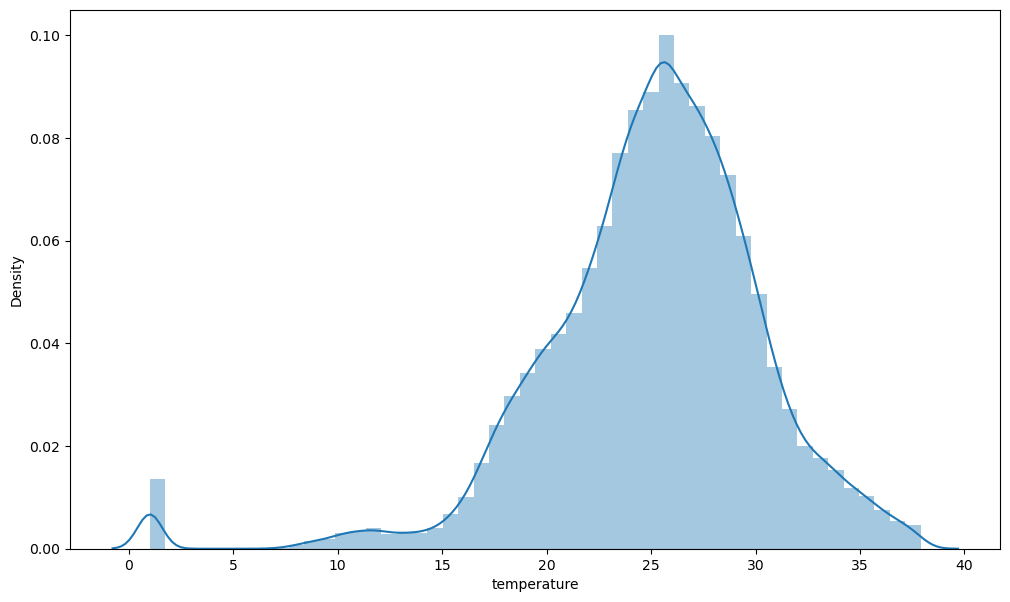

In [38]:
plt.figure(figsize = [12,7])
sns.distplot(df['temperature'])

C:\Users\afraa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='humidity', ylabel='Density'>

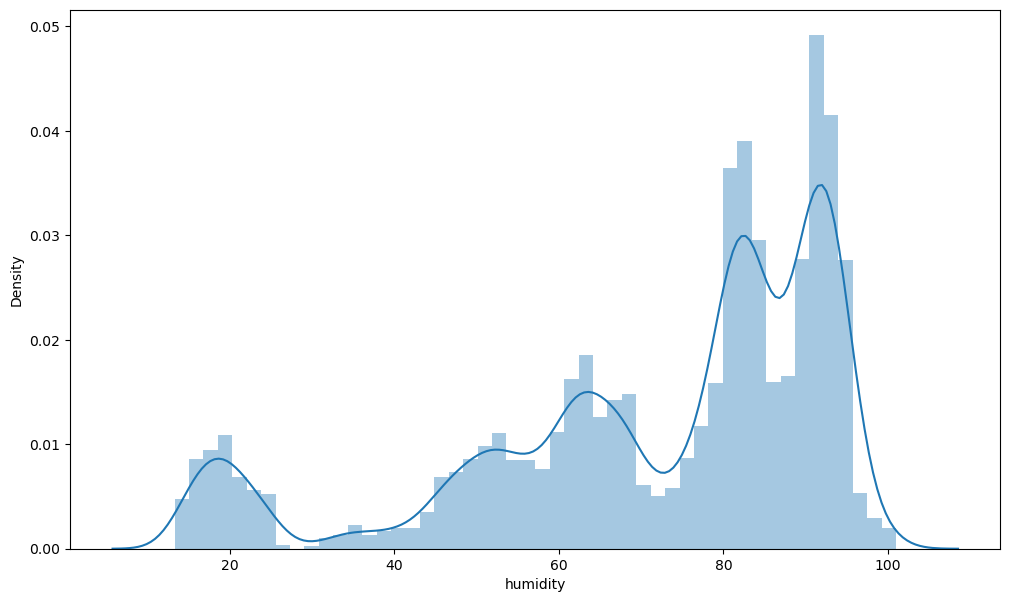

In [39]:
plt.figure(figsize = [12,7])
sns.distplot(df['humidity'])

C:\Users\afraa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ph', ylabel='Density'>

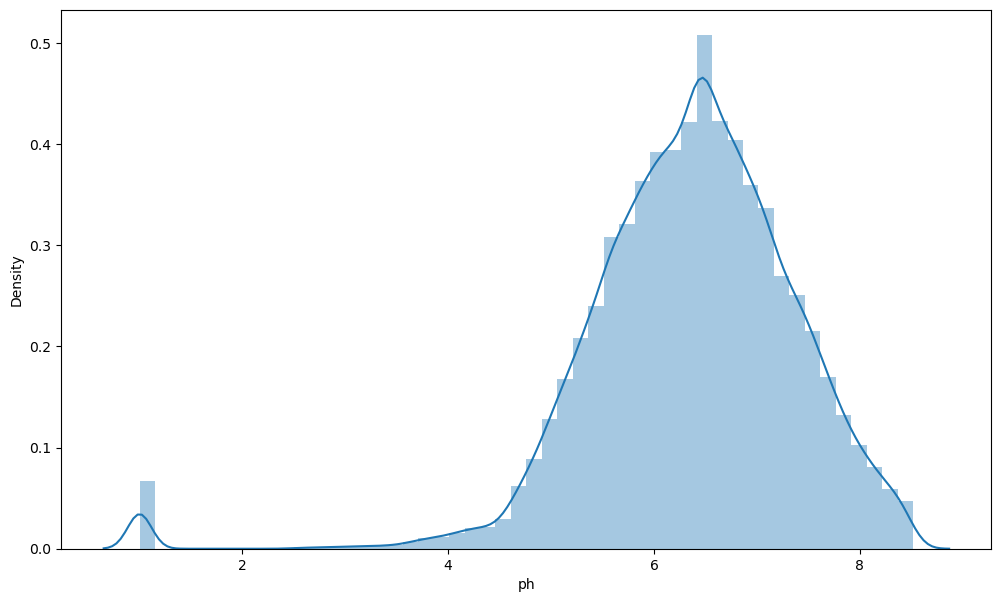

In [40]:
plt.figure(figsize = [12,7])
sns.distplot(df['ph'])

C:\Users\afraa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rainfall', ylabel='Density'>

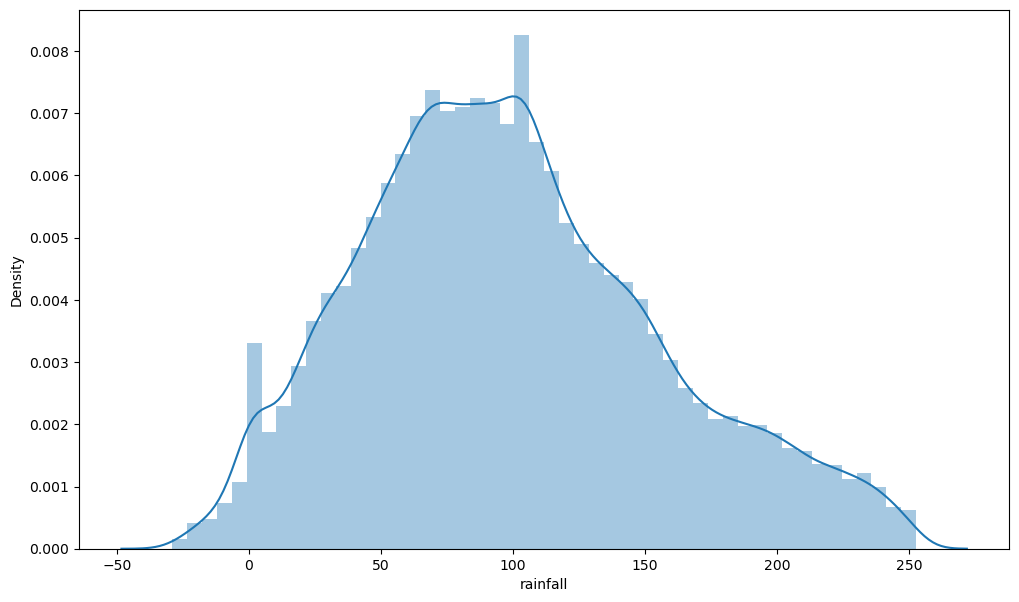

In [41]:
plt.figure(figsize = [12,7])
sns.distplot(df['rainfall'])

Observation:
1) The values of the Nitrogen column are highly variated

2) The values of Phosphorous have variance

3) The graph for Potassium shows that the data is Right skewed with outliers present at the higher side

4) The graph for temperatures reflects that that data is left skewed with outliers on the lower side

5) The data of Humidity is with high variance

6)  The graph of pH values shows that the data is left skewed with outliers present on the lower side

7) The graph for rainfall shows a normal distribution